# 读取数据

每个类被随机展示10张

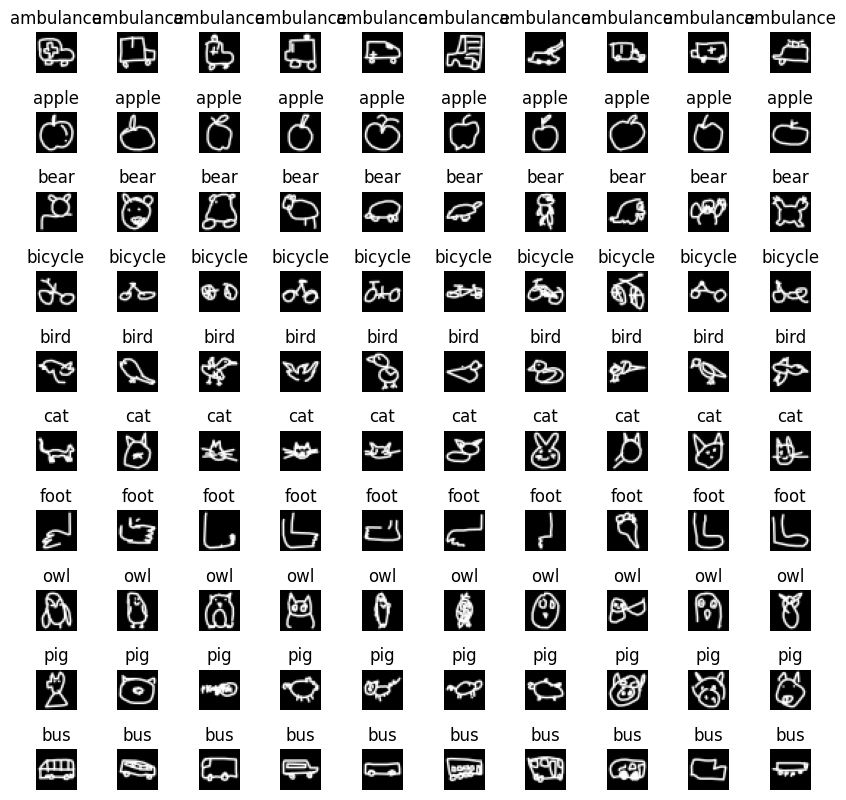

In [20]:
import numpy as np
import os
import matplotlib.pyplot as plt
import random
from PIL import Image

fig, subplots = plt.subplots(10, 10, figsize=(10, 10))
# 调整子图之间的间距
plt.subplots_adjust(wspace=1, hspace=0.5)

path_name = ['ambulance', 'apple', 'bear', 'bicycle', 'bird', 'cat', 'foot', 'owl', 'pig', 'bus']
data = {}
show_idx = 0
for name in path_name:
    data[name] = np.load(f'./data/quick_draw_data/{name}/{name}.npy')
    assert data[name].shape == (20000, 784) # 20000个样本，每个样本784维，需要reshape成28*28
    data[name] = data[name].reshape((20000, 28, 28))

    for k in range(10): 
        img = Image.fromarray(data[name][random.randint(0, 19999)])
        # 展示图片
        subplots[show_idx // 10, show_idx % 10].imshow(img, cmap='gray')
        # 不显示坐标轴，显示标题
        subplots[show_idx // 10, show_idx % 10].axis('off')
        subplots[show_idx // 10, show_idx % 10].set_title(name)
        show_idx += 1

In [21]:
np.zeros((10, 10))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [22]:
np.zeros((10, 10)) + 1

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [23]:
# 合并所有数据
x = np.concatenate(list(data.values()))
# 合并所有标签
y = np.concatenate([np.zeros((len(data[name]),)) + i for i, name in enumerate(data.keys())])
# x, y的下标一一对应
x.shape, y.shape

((200000, 28, 28), (200000,))

# 数据划分

In [24]:
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader



def train_test_valid_split(x, y, train_percent=0.6, test_percent=0.3, valid_percent=0.1, stratify=None, random_state=12):
    """将数据集划分为训练集、验证集、测试集

    Args:
        x (_type_): _description_
        y (_type_): _description_

    Returns:
        _type_: _description_
    """
    # 常用的划分数据集为三部分的套路:
    # 划分训练集、验证集、测试集
    ## test_size=0.4表示测试集占总数据的40%，stratify=y表示按照y进行分层抽样，random_state=12表示随机种子，固定随机种子以保证每次划分的结果一致
    x_train, x_other, y_train, y_other = train_test_split(x, y, test_size=1 - train_percent, stratify=y, random_state=12)
    x_test, x_verify, y_test, y_verify = train_test_split(x_other, y_other, test_size=(valid_percent) / (valid_percent + test_percent) , stratify=y_other, random_state=12)
    return x_train, x_test, x_verify, y_train, y_test, y_verify

x_train, x_test, x_verify, y_train, y_test, y_verify = train_test_valid_split(x, y, train_percent=0.6, test_percent=0.3, valid_percent=0.1, stratify=y, random_state=12)

# 查看数据量
print(x_train.shape, x_test.shape, x_verify.shape)
print(y_train.shape, y_test.shape, y_verify.shape)

(120000, 28, 28) (60000, 28, 28) (20000, 28, 28)
(120000,) (60000,) (20000,)


# 数据处理

In [25]:
# 归一化
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0
x_verify = x_verify.reshape(-1, 28, 28, 1) / 255.0

print(x_train.shape)

(120000, 28, 28, 1)


In [26]:
x_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [11]:
y_train = F.one_hot(torch.from_numpy(y_train).long())
y_test = F.one_hot(torch.from_numpy(y_test).long())
y_verify = F.one_hot(torch.from_numpy(y_verify).long())

NameError: name 'F' is not defined

In [40]:
y_test = y_test.float()
y_train = y_train.float()
y_verify = y_verify.float()

In [41]:
y_test

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],


In [42]:
x_train = torch.from_numpy(x_train)
x_other = torch.from_numpy(x_other)
x_verify = torch.from_numpy(x_verify)

In [43]:
x_train.shape

torch.Size([120000, 28, 28, 1])

# 卷积神经网络

In [52]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        #  数据初始为(28,28,1)
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, dtype=torch.double)
        # 经过conv1 后变为(26,26,32)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        # 经过pool1 后变为(13,13,32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, dtype=torch.double)
        # 经过conv2 后变为(11,11,64)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        # 经过pool2 后变为(5,5,64)
        self.fc1 = nn.Linear(64*5*5, 64)
        # 经过fc1 后变为(64,) , 此处忽略了batch_size,正常应该是(batch_size, 1600) * (1600, 64) 加上一个bias最后得到一个(batch_size, 64)
        self.fc2 = nn.Linear(64, 10)
        # 经过fc2 后变为(10,)
        self.losses = []
        # 损失列表
        self.val_losses = []
        # 验证集损失列表
        
    def forward(self, x):
        # 通过relu激活
        x = F.relu(self.conv1(x))
        # 池化
        x = self.pool1(x)
        # 通过relu激活
        x = F.relu(self.conv2(x))
        # 池化
        x = self.pool2(x)
        # 将池化后的64通道的5*5的图片展平,变成1600
        x = x.reshape(-1, 64 * 5 * 5)
        x = x.float()
        # 通过relu激活
        x = F.relu(self.fc1(x))
        # 通过softmax激活函数归一化
        x = self.fc2(x)
        return x
    
    def train_model(self, train_loader, val_loader, epochs=100, learning_rate=0.01):
        # 定义损失函数,此处使用交叉熵损失函数
        criterion = nn.CrossEntropyLoss()
        # 采用自适应矩估计(Adaptive Moment Estimation)算法
        optimizer = torch.optim.Adam(self.parameters(), lr=learning_rate)
        for epoch in range(epochs):
            runnning_loss = 0.0
            for i, (inputs, labels) in enumerate(train_loader, 0):
                # 将模式设置为训练模式
                self.train()
                # 每次训练进行梯度清零
                optimizer.zero_grad()
                inputs_change = inputs.permute(0, 3, 1, 2)
                # 前向传播
                outputs = self.forward(inputs_change)
                # 计算损失
                loss = criterion(outputs, labels)
                # 反向传播
                loss.backward()
                # 更新参数
                optimizer.step()
                # 计算累积损失
                runnning_loss += loss.item()
                
            # 在验证集上评估模型
            val_loss = self.validate(val_loader)
            # 记录每个epoch的损失
            self.losses.append(runnning_loss / len(train_loader))
            self.val_losses.append(val_loss)
            
    def evaluate(self, data_loader):
        correct = 0
        total = 0
        with torch.no_grad():
            for data in data_loader:
                inputs, labels = data
                inputs_change = inputs.permute(0, 3, 1, 2)
                outputs = self.forward(inputs_change)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                # 计算正确的个数
                correct += (predicted == labels).sum().item()
        return correct / total
    
    def predict(self, test_loader):
        with torch.no_grad():
            for data in test_loader:
                inputs, labels = data
                inputs_change = inputs.permute(0, 3, 1, 2)
                output = self.forward(inputs_change)
                _, predicted = torch.max(output.data, 1)
        return predicted
    
    def validate(self, val_loader):
        # 将模型设置为评估模式
        self.eval()
        # 禁止梯度计算
        with torch.no_grad():
            val_loss = 0.0
            for inputs, labels in val_loader:
                inputs_change = inputs.permute(0, 3, 1, 2)
                # 前向传播
                outputs = self.forward(inputs_change)
                loss = nn.functional.cross_entropy(outputs, labels)
                val_loss += loss.item()
        # 将模型设置为训练模式
        self.train()
        # 返回平均验证损失
        return val_loss / len(val_loader)

In [53]:
epoch, learning_rate, batch_size = 1, 0.01, 128
# 定义网络
net = Net()
# 数据处理
train_dataset = D.TensorDataset(x_train, y_train)
train_loader = D.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = D.TensorDataset(x_other, y_test)
test_loader = D.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
val_dataset = D.TensorDataset(x_verify, y_verify)
val_loader = D.DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
print("val_loader")

# 训练模型
net.train_model(train_loader, val_loader, epochs=epoch, learning_rate=learning_rate)
print("train_model")

# 预测测试集准确率并画柱状图展示
y_pred = np.argmax(net.predict(test_loader), axis=1)
print("y_pred")
accuracy = net.evaluate(test_loader)

print("accuracy")
plt.bar(np.arange(10), [np.sum(np.argmax(y_test, axis=1) == i) for i in range(10)], label='True')
print("label")
plt.bar(np.arange(10), [np.sum(y_pred == i) for i in range(10)], alpha=0.5, label='Predicted')
print('Predicted')
plt.xticks(np.arange(10), path_name)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title(f'Test Accuracy: {accuracy:.2%}')
plt.legend()
plt.show()

val_loader
train_model


AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.pool2 =  
        self.fc1 = nn.Linear(64*5*5, 64)
        self.fc2 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.view(-1, 64*5*5)
        x = F.relu(self.fc1(x))
        x = F.softmax(self.fc2(x), dim=1)
        return x

model = Net()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# 读取数据
data = {}
for name in ['owl', 'cat', 'ambulance', 'apple', 'foot', 'bear', 'bicycle', 'bird', 'pig', 'bus']:
    data[name] = np.load(f'quick_draw_data/{name}/{name}.npy')

# 构建CNN模型
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 划分训练集和验证集
x_train, X_test, y_train, y_test = train_test_split(np.concatenate(list(data.values())),
np.concatenate([np.full((len(data[name]),), i) for i, name in enumerate(data.keys())]),
test_size=0.1,
stratify=np.concatenate([np.full((len(data[name]),), i) for i, name in enumerate(data.keys())]),shuffle=True,random_state=42)

# 归一化和重新整形
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 编译模型
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 训练模型
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.1)

# 预测测试集准确率并画柱状图展示
y_pred = np.argmax(model.predict(X_test), axis=1)
accuracy = np.mean(y_pred == np.argmax(y_test, axis=1))

plt.bar(np.arange(10), [np.sum(np.argmax(y_test, axis=1) == i) for i in range(10)], label='True')
plt.bar(np.arange(10), [np.sum(y_pred == i) for i in range(10)], alpha=0.5, label='Predicted')
plt.xticks(np.arange(10), ['owl', 'cat', 'ambulance', 'apple', 'foot', 'bear', 'bicycle', 'bird', 'pig', 'bus'])
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title(f'Test Accuracy: {accuracy:.2%}')
plt.legend()
plt.show()

# lstm实现的简笔画分类

In [46]:
from torch import nn
import torch
class Net_LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(Net_LSTM, self).__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        # 初始化隐层和细胞状态
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).double()
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).double()
        # 前向传播LSTM
        out, _ = self.lstm(x, (h0, c0))
        # 解码最后一个时刻的隐状态
        out = self.fc(out[:, -1, :])
        return out

In [48]:
# 数据集定义
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, data, label):
        self.data = data
        self.label = label
    
    def __getitem__(self, index):
        return self.data[index], self.label[index]
    
    def __len__(self):
        return len(self.data)

In [51]:
def validate(val_loader):
    # 将模型设置为评估模式
    model.eval()
    # 禁止梯度计算
    with torch.no_grad():
        val_loss = 0.0
        for inputs, labels in val_loader:
            # 前向传播
            outputs = model(inputs)
            loss = nn.functional.cross_entropy(outputs, labels)
            val_loss += loss.item()
    # 将模型设置为训练模式
    model.train()
    # 返回平均验证损失
    return val_loss / len(val_loader)
train_dataset = MyDataset(x_train, y_train)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
model = Net_LSTM(28, 128, 2, 10)
epochs = 10
batch_size = 128
criteria = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
losses = []
val_losses = []
for epoch in range(epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader, 0):
        # 将模式设置为训练模式
        model.train()
        # 每次训练进行梯度清零
        optimizer.zero_grad()
        # 前向传播
        outputs = model(inputs)
        # 计算损失
        loss = criteria(outputs, labels)
        # 反向传播
        loss.backward()
        # 更新参数
        optimizer.step()
        # 计算累积损失
        running_loss += loss.item()
    # 在验证集上评估模型
    val_loss = validate(val_loader)
    # 记录每个epoch的损失
    losses.append(running_loss / len(train_loader))
    val_losses.append(val_loss)

AssertionError: LSTM: Expected input to be 2-D or 3-D but received 4-D tensor

# 实验 5.2

## 读取数据

In [3]:
%clear
import numpy as np
import torch
import os
import matplotlib.pyplot as plt

data = {}
for i in os.listdir("./data/sketch_datas/"):
    data_name = i.split(".")[0]
    data[data_name] = np.load(f'./data/sketch_datas/{i}')


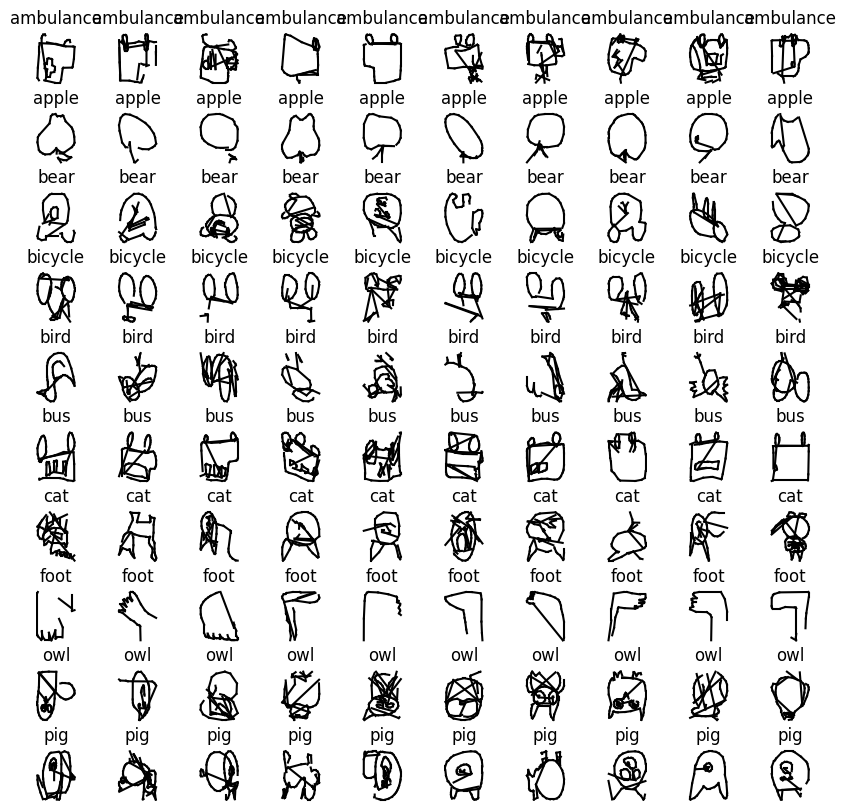

In [4]:
# 可视化
fix, ax = plt.subplots(10, 10, figsize=(10, 10))
plt.subplots_adjust(wspace=1, hspace=0.5)
for i, name in enumerate(data.keys()):
    for name in range(10):
        x = 0
        y = 0
        for dx, dy, p1, p2, p3 in data[name][name]:
            # 起笔
            if p1 == 1:
                ax[i, name].plot([x, x + dx], [y, y + dy], color='black')
            # 提笔 
            if p3 == 1:
                break
            x += dx
            y += dy
        ax[i, name].axis('off')
        ax[i, name].set_title(name)
       
plt.show()

In [8]:
data["pig"].shape # 70000个样本，每个样本中有151笔画

(70000, 151, 5)

In [9]:
max_sketch = 0
# 找最大笔画数
for one_pic in data.values():
    if max_sketch < one_pic.shape[1]:
        max_sketch = one_pic.shape[1]
print(max_sketch)



151


In [12]:
# 数据预处理和划分数据集
from sklearn.model_selection import train_test_split


# 数据预处理（统一维度，少的补充[0 0 0 0 1]) 当前数据集为151
sketch = np.array([0, 0, 0, 0, 1])
for i, name in enumerate(data.keys()):
    if data[name].shape[1] == max_sketch:
        continue
    for r in range(max_sketch - data[name].shape[1]):
        data[name] = np.concatenate([data[name], np.tile(np.expand_dims(sketch, axis=0), (data[name].shape[0], 1, 1))], axis=1)
    assert data[name].shape[1] == max_sketch

In [14]:
# 数据预处理和划分数据集
from sklearn.model_selection import train_test_split

# 合并数据
x = np.concatenate(list(data.values()))
# 合并标签
y = np.concatenate([np.zeros((len(data[name]),)) + i for i, name in enumerate(data.keys())])

print(x.shape, y.shape)
print(y)
assert x.shape[0] == y.shape[0]


def train_test_valid_split(x, y, train_percent=0.6, test_percent=0.3, valid_percent=0.1, stratify=None, random_state=12):
    """将数据集划分为训练集、验证集、测试集

    Args:
        x (_type_): _description_
        y (_type_): _description_

    Returns:
        _type_: _description_
    """
    # 常用的划分数据集为三部分的套路:
    # 划分训练集、验证集、测试集
    ## test_size=0.4表示测试集占总数据的40%，stratify=y表示按照y进行分层抽样，random_state=12表示随机种子，固定随机种子以保证每次划分的结果一致
    x_train, x_other, y_train, y_other = train_test_split(x, y, test_size=1 - train_percent, stratify=y, random_state=12)
    x_test, x_verify, y_test, y_verify = train_test_split(x_other, y_other, test_size=(valid_percent) / (valid_percent + test_percent) , stratify=y_other, random_state=12)
    return x_train, x_test, x_verify, y_train, y_test, y_verify

x_train, x_test, x_verify, y_train, y_test, y_verify = train_test_valid_split(x, y, train_percent=0.6, test_percent=0.3, valid_percent=0.1, stratify=y, random_state=12)

print(x_train.shape, x_test.shape, x_verify.shape)
print(y_train.shape, y_test.shape, y_verify.shape)

(700000, 151, 5) (700000,)
[0. 0. 0. ... 9. 9. 9.]
(420000, 151, 5) (210000, 151, 5) (70000, 151, 5)
(420000,) (210000,) (70000,)


In [15]:
# tensor 格式数据
x_train = torch.from_numpy(x_train)
x_test = torch.from_numpy(x_test)
x_verify = torch.from_numpy(x_verify)


# 标签 one-hot 编码
def one_hot(labels, num_classes):
    return np.eye(num_classes)[labels]


y_train = one_hot(y_train, 10)
y_test = one_hot(y_test, 10)
y_verify = one_hot(y_verify, 10)

y_train = torch.from_numpy(y_train)
y_test = torch.from_numpy(y_test)
y_verify = torch.from_numpy(y_verify)


assert x_train.shape[0] == y_train.shape[0]
assert x_test.shape[0] == y_test.shape[0]
assert x_verify.shape[0] == y_verify.shape[0]

y_train

IndexError: tensors used as indices must be long, int, byte or bool tensors